In [1]:
import pandas as pd
import matplotlib.pyplot as plt


loading the cleaned dataset

In [3]:
df=pd.read_csv(r"C:\Users\shubh\Downloads\archive (32)\Cleaned-Data.csv")
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


Checking the datatypes

In [5]:
df.dtypes

Fever                       int64
Tiredness                   int64
Dry-Cough                   int64
Difficulty-in-Breathing     int64
Sore-Throat                 int64
None_Sympton                int64
Pains                       int64
Nasal-Congestion            int64
Runny-Nose                  int64
Diarrhea                    int64
None_Experiencing           int64
Age_0-9                     int64
Age_10-19                   int64
Age_20-24                   int64
Age_25-59                   int64
Age_60+                     int64
Gender_Female               int64
Gender_Male                 int64
Gender_Transgender          int64
Severity_Mild               int64
Severity_Moderate           int64
Severity_None               int64
Severity_Severe             int64
Contact_Dont-Know           int64
Contact_No                  int64
Contact_Yes                 int64
Country                    object
dtype: object

splitting to get the target variable

In [6]:
x=df.drop('Country',axis=1)

Elbow Method

wcss
 [1634380.9090907774, 1530430.9090907876, 1423180.9090907394, 1395680.909090937, 1357180.9090907138, 1319911.8614717, 1282380.9090910503, 1259280.9090910677, 1236659.6969698183, 1219519.3706295248, 1205027.2798066537]


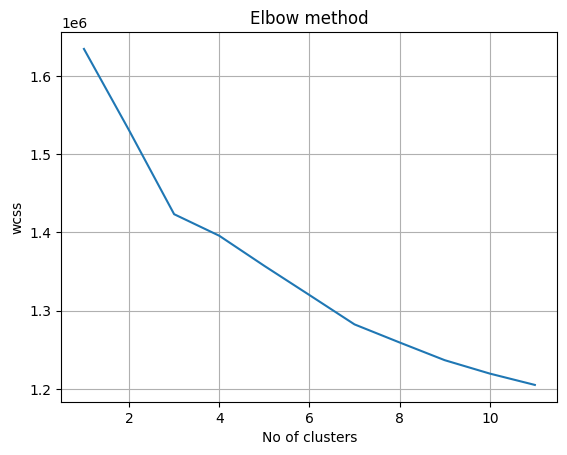

In [8]:
from sklearn.cluster import KMeans

#within cluster sum of square
wcss=[]

for i in range(1,12):
    model=KMeans(n_clusters=i)
    model.fit(x)
    wcss.append(model.inertia_)

print('wcss\n',wcss)

plt.plot(list(range(1,12)),wcss)
plt.xlabel('No of clusters')
plt.ylabel('wcss')
plt.title('Elbow method')
plt.grid()
plt.show()

optimal number of clusters obtained from the elbow method is 3

In [9]:
k3=KMeans(n_clusters=3)
k3.fit(x)

KMeans(n_clusters=3)

In [10]:
ypred_k3=k3.predict(x)
ypred_k3

array([2, 2, 2, ..., 1, 1, 1])

In [11]:
df['Cluster3']=ypred_k3
df.head(2)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country,Cluster3
0,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,0,0,0,1,China,2
1,1,1,1,1,1,0,1,1,1,1,...,0,1,0,0,0,0,1,0,China,2


In [13]:
df[['Country','Fever','Cluster3']].sort_values(by='Cluster3')

,Country,Fever,Cluster3
158796,Spain,1,0
185248,Spain,0,0
185247,Spain,0,0
185246,Spain,0,0
185245,Spain,0,0
...,...,...,...
95046,Republic of Korean,1,2
95047,Republic of Korean,1,2
95048,Republic of Korean,1,2
95050,Republic of Korean,1,2
